# Analyse simulation data from output_data folder


----------
--------------

import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys
import os

testing example for pixel_translator class
 - aim: converting intaraciton location to pixel id

In [ ]:
from src import PixelTranslator
importlib.reload(PixelTranslator)
    
# Example usage of PixelTranslator
detector_length = 20.0  # cm
detector_width = 20.0  # cm
n_pixels_x = 100  # Number of pixels along the x direction
n_pixels_y = 100  # Number of pixels along the y direction

location = (10.0, -10)  # Example location in cm
translator = PixelTranslator.pixel_translator(detector_length, detector_width, n_pixels_x, n_pixels_y)
pixel_indices = translator.translate(location)
print(f"Pixel indices for location {location}: {pixel_indices}")

Pixel indices for location (10.0, -10): (99, 0)


## **how to append path???**

* print current folder 

In [168]:
import os
print(os.getcwd())

c:\FAKS\MAGISTERIJ\MODELSKA_ANALIZA_1\MA1 naloge\MA-ZaključnaNaloga\main\code\PPS_photon_propagation_simulation


* use sys, os? path appending, using ../ ??

In [ ]:
 #* a) use sys ?
# sys.path.append('../../output_data')
# sys.path.append('../..')


#* b) os + sys ?
simulation_data_path = os.path.abspath("../../simulation_data")
if simulation_data_path not in sys.path:
    sys.path.append(simulation_data_path)



## **START OF FILES ANALIZATION SCRIPT**
---
---
# Define simulation parameters
 - have to match reals simulation parameters!

In [124]:
tissue_length = 20
tissue_box = (tissue_length,tissue_length) 
num_pixels_x = 5
num_pixels_y = num_pixels_x
Nsim = 10000

from src import LinearAttenuationCoefficients as LAC
importlib.reload(LAC)

#$ monoenergetic photons
beam_type = "mono"  # "mono" or "rtg"
E_mono = 0.06 # MeV
Ebeam = E_mono

path = "../mac_nistxcom/mac_tissue.txt"
tissue_density = 1.06  # g/cm^3
lac_data = LAC.LACLoader(path, tissue_density,"soft_tissue")
lac_mono = lac_data.get_lac_at_energy(E_mono)
print(f"Using {beam_type}energetic beam with E = {E_mono} MeV"
      f"; (mean free path = {1/lac_mono:.4f} cm)"
      )

#$ rtg spectrum 
Emax = 6 # MeV
Emean = Emax / 3 # MeV, approx for 6 MeV Bremsstrahlung spectrum



Using monoenergetic beam with E = 0.06 MeV; (mean free path = 4.7934 cm)


### define filename 
 - assumes file is is **simulation_data** folder

In [114]:
foldername = "./simulation_data"

# data file from the simulation
filename = "run_b4of5"  # Replace with your actual filename
filename = "Mono_60kev_20cm_5pixels_1e5/beam0"
#filename = "example_mono_80kev"
#filename = "run_mono_80kev_1e5"
filename = "run_mono_30cm_3of11pxl_80kev"
#filename = "run_mono_60kev_1e3_beam2"

filepath = f"{foldername}/{filename}.txt"
print(f"Filepath to file of the simulation data: {filepath}")

Filepath to file of the simulation data: ./simulation_data/run_mono_30cm_3of11pxl_80kev.txt


new: using subfolders

In [121]:
beam_index = 2
foldername = f"{beam_type}_{tissue_length}cm_{num_pixels_x}pixels_{Ebeam*1000:.0f}kev_{Nsim:.0e}photons"
filename = f"beam{beam_index}.txt"
# group folder and file name into path to file
filepath = f"./simulation_data/{foldername}/{filename}"

print(f"Filepath to file of the simulation data: {filepath}")

Filepath to file of the simulation data: ./simulation_data/mono_20cm_5pixels_60kev_1e+04photons/beam2.txt


### import analyser calss and initilazie instance

In [122]:
from src import EnergyDeposition as EDP
importlib.reload(EDP)

#* initialize analyser 
print(f"Filepath: {filepath}")
analyzer = EDP.Edep_analyser(filepath, num_pixels_x, num_pixels_y, detector_shape = tissue_dimensions)


Filepath: ./simulation_data/mono_20cm_5pixels_60kev_1e+04photons/beam2.txt


### analyse and plot

Normalized energy deposition map:
 [[0.05792096 0.0620463  0.0561427  0.024835   0.01207666]
 [0.15646651 0.16186873 0.11008734 0.05631343 0.02904477]
 [1.         0.5410391  0.27429274 0.12740934 0.05332661]
 [0.15124566 0.14846724 0.11081704 0.05423393 0.02626281]
 [0.05160904 0.06271508 0.0506723  0.03637261 0.01311286]]


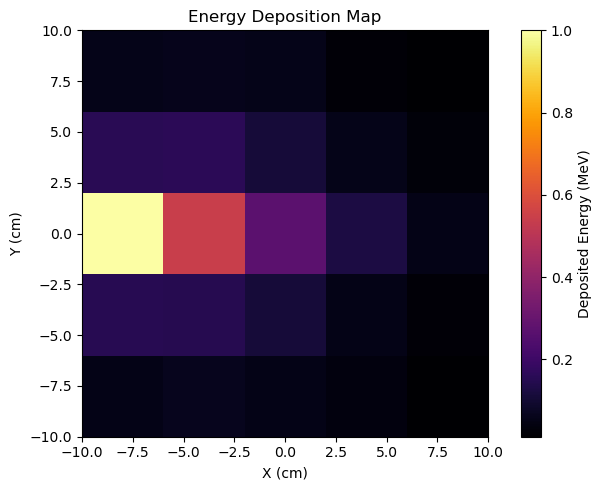

In [123]:
Edep_map_normalized = analyzer.analyse()
print("Normalized energy deposition map:\n", Edep_map_normalized)
analyzer.plot(normalized=True)  # Plot the normalized energy deposition map

Foldername: mono_20cm_5pixels_60kev_1e+04photons
Analyzing file: ./simulation_data/mono_20cm_5pixels_60kev_1e+04photons/beam0.txt
SIF for beam index 0:
[[1.         0.54717615 0.2672455  0.11485421 0.05760505]
 [0.13984552 0.14294261 0.10371335 0.0604026  0.02616945]
 [0.05532874 0.06014943 0.04228645 0.02825992 0.01993466]
 [0.02215786 0.03245168 0.02794408 0.02389322 0.        ]
 [0.01157942 0.         0.         0.         0.        ]]


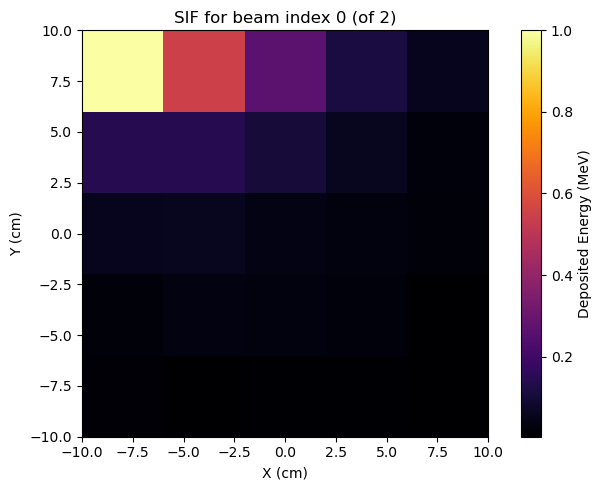

Analyzing file: ./simulation_data/mono_20cm_5pixels_60kev_1e+04photons/beam1.txt
SIF for beam index 1:
[[0.14013151 0.15133766 0.09463368 0.05057669 0.02572043]
 [1.         0.54660021 0.28157377 0.13331703 0.0618149 ]
 [0.15290365 0.15963928 0.1040686  0.05808261 0.02609793]
 [0.06272576 0.0665774  0.05348281 0.0318749  0.01918411]
 [0.02003191 0.02715918 0.02314995 0.01897465 0.        ]]


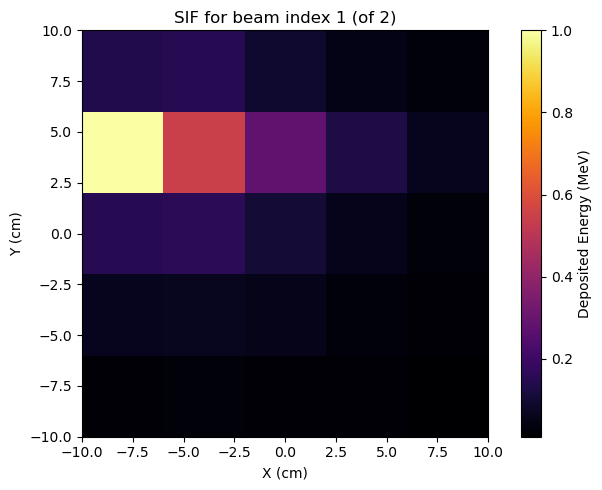

Analyzing file: ./simulation_data/mono_20cm_5pixels_60kev_1e+04photons/beam2.txt
SIF for beam index 2:
[[0.05792096 0.0620463  0.0561427  0.024835   0.01207666]
 [0.15646651 0.16186873 0.11008734 0.05631343 0.02904477]
 [1.         0.5410391  0.27429274 0.12740934 0.05332661]
 [0.15124566 0.14846724 0.11081704 0.05423393 0.02626281]
 [0.05160904 0.06271508 0.0506723  0.03637261 0.01311286]]


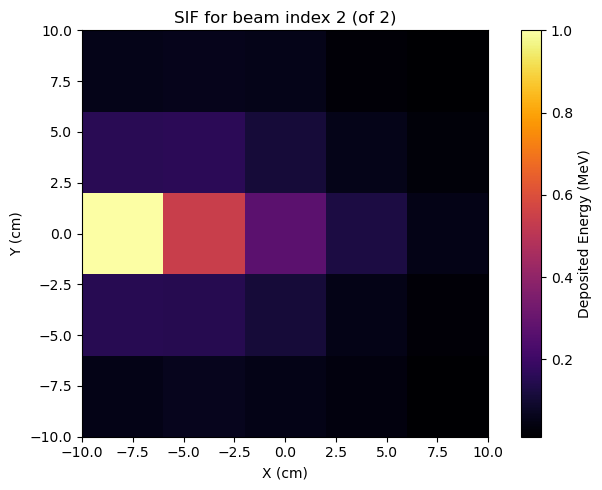

In [127]:
N = num_pixels_x
max_beam_index = N // 2
Nupper = max_beam_index + 1
SIF_simulation = np.zeros((Nupper, N, N))
foldername = f"{beam_type}_{tissue_length}cm_{num_pixels_x}pixels_{Ebeam*1000:.0f}kev_{Nsim:.0e}photons"
print(f"Foldername: {foldername}")

# fill the matrix
for i in range(Nupper):
    filename = f"beam{i}.txt"
    fpath = f"./simulation_data/{foldername}/{filename}"
    print(f"Analyzing file: {fpath}")
    analyzer = EDP.Edep_analyser(fpath, N,N, detector_shape=tissue_box)
    SIF_simulation[i] = analyzer.analyse()
    print(f"SIF for beam index {i}:\n{SIF_simulation[i]}")
    analyzer.plot(normalized=True, title=f"SIF for beam index {i} (of {max_beam_index})")

In [159]:
SIF_simulation[2]

array([[0.05792096, 0.0620463 , 0.0561427 , 0.024835  , 0.01207666],
       [0.15646651, 0.16186873, 0.11008734, 0.05631343, 0.02904477],
       [1.        , 0.5410391 , 0.27429274, 0.12740934, 0.05332661],
       [0.15124566, 0.14846724, 0.11081704, 0.05423393, 0.02626281],
       [0.05160904, 0.06271508, 0.0506723 , 0.03637261, 0.01311286]])

In [160]:
from src import BeamDataExpansion as BDE
SIF_total = BDE.expand_to_4Nbeams(SIF_simulation)


In [167]:
print(SIF_total[1])
print("\n")
print(SIF_total[3])

[[0.14013151 0.15133766 0.09463368 0.05057669 0.02572043]
 [1.         0.54660021 0.28157377 0.13331703 0.0618149 ]
 [0.15290365 0.15963928 0.1040686  0.05808261 0.02609793]
 [0.06272576 0.0665774  0.05348281 0.0318749  0.01918411]
 [0.02003191 0.02715918 0.02314995 0.01897465 0.        ]]


[[0.02003191 0.02715918 0.02314995 0.01897465 0.        ]
 [0.06272576 0.0665774  0.05348281 0.0318749  0.01918411]
 [0.15290365 0.15963928 0.1040686  0.05808261 0.02609793]
 [1.         0.54660021 0.28157377 0.13331703 0.0618149 ]
 [0.14013151 0.15133766 0.09463368 0.05057669 0.02572043]]


---
---
---

### All work fine

In [174]:
b = np.array([[[1, 2, 2], [3, 4, 4], [5, 6, 7]], [[7, 8, 8], [9, 10, 10], [11, 12, 12]]])
print(b)

# Expand the beam data to 4N beams
from src import BeamDataExpansion as BDE
importlib.reload(BDE)
b_tot = BDE.expand_to_4Nbeams(b)

[[[ 1  2  2]
  [ 3  4  4]
  [ 5  6  7]]

 [[ 7  8  8]
  [ 9 10 10]
  [11 12 12]]]


In [175]:
# first beams in direction
print("upper beams")
print(b_tot[0])
print(b_tot[3])
print(b_tot[6])
print(b_tot[9])

# last/lower beams 
print("\nlower beams")
print(b_tot[2])
print(b_tot[5])
print(b_tot[8])
print(b_tot[11])

# central beams 
print("\ncentral beams")
print(b_tot[1])
print(b_tot[4])
print(b_tot[7])
print(b_tot[10])

upper beams
[[1 2 2]
 [3 4 4]
 [5 6 7]]
[[2 2 1]
 [4 4 3]
 [7 6 5]]
[[5 3 1]
 [6 4 2]
 [7 4 2]]
[[2 4 7]
 [2 4 6]
 [1 3 5]]

lower beams
[[5 6 7]
 [3 4 4]
 [1 2 2]]
[[7 6 5]
 [4 4 3]
 [2 2 1]]
[[1 3 5]
 [2 4 6]
 [2 4 7]]
[[7 4 2]
 [6 4 2]
 [5 3 1]]

central beams
[[ 7  8  8]
 [ 9 10 10]
 [11 12 12]]
[[ 8  8  7]
 [10 10  9]
 [12 12 11]]
[[11  9  7]
 [12 10  8]
 [12 10  8]]
[[ 8 10 12]
 [ 8 10 12]
 [ 7  9 11]]


In [88]:
print(SIF_total[2])
print("\n")
print(SIF_total[17])

[[0.06479063 0.08014244 0.06495648 0.04037747 0.02757267]
 [0.16640302 0.17203173 0.11387053 0.08287598 0.0457855 ]
 [1.         0.61509546 0.34606426 0.1781562  0.10093669]
 [0.16681543 0.17327563 0.13235779 0.08698768 0.05121404]
 [0.05938278 0.08113998 0.06329158 0.04523295 0.02331287]]


[[0.02757267 0.0457855  0.10093669 0.05121404 0.02331287]
 [0.04037747 0.08287598 0.1781562  0.08698768 0.04523295]
 [0.06495648 0.11387053 0.34606426 0.13235779 0.06329158]
 [0.08014244 0.17203173 0.61509546 0.17327563 0.08113998]
 [0.06479063 0.16640302 1.         0.16681543 0.05938278]]


save delta_kij as npy file
---

In [ ]:
SIF_file_name = "SIF_expanded.npy"
np.save(SIF_file_name, SIF_total)

### Test on real data